## **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [1]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import MatPlotLib and Seaborn to help visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Import os for file reader
import os

In [2]:
# Get current working directory
current_directory = os.getcwd()
print(current_directory)

/Users/brandonrose/Midterm_Project


In [3]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv(current_directory +'/data/flights_10000.csv')

In [4]:
data.drop(['Unnamed: 0', 'no_name'], axis=1, inplace=True)

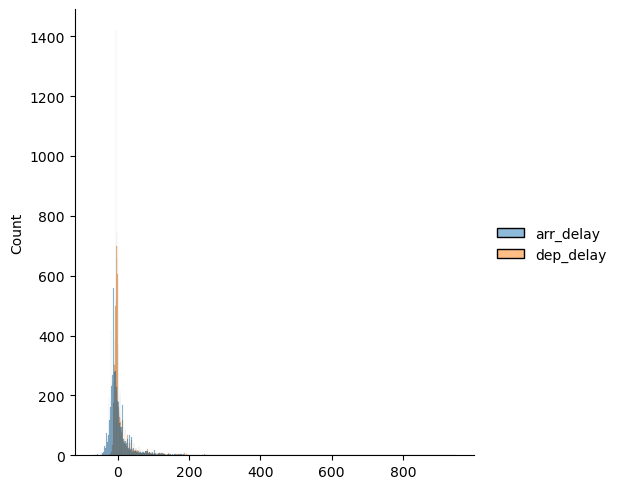

In [5]:
# Initial Distplot to see how the data is before adjustment
sns.displot(data[['arr_delay', 'dep_delay']])

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

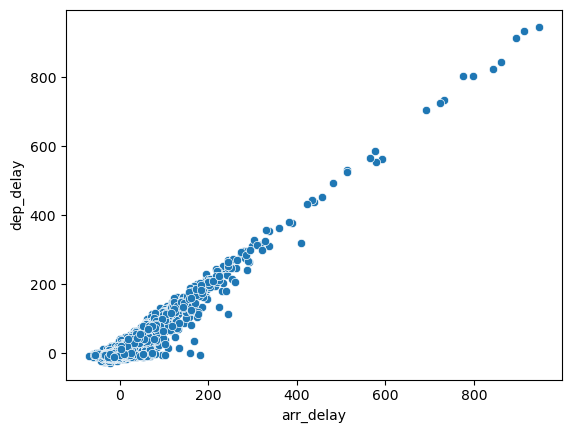

In [6]:
# Visual check for outliers with scatter
sns.scatterplot(data, x='arr_delay', y='dep_delay')

In [7]:
# Drop Outliers
# Isolate the rows that ONLY have an arrival or departure delay
delay_times = data[((data['arr_delay'] > 0) & (data['arr_delay'] < 400)) | ((data['dep_delay'] > 0) & (data['dep_delay'] < 400))].reset_index()

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

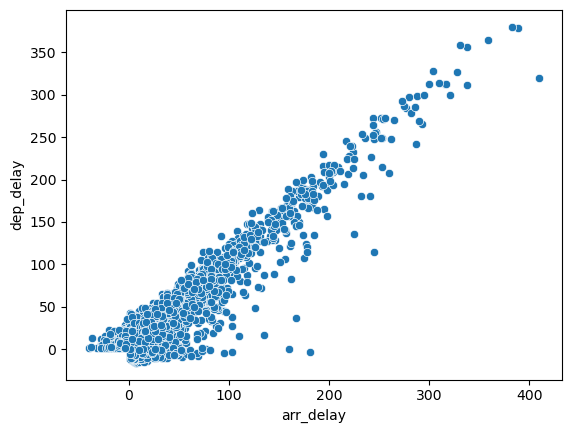

In [8]:
# New Scatterplot
sns.scatterplot(delay_times, x='arr_delay', y='dep_delay')

In [9]:
# Isolate the delay times
delays_only_df = delay_times.loc[:, ['arr_delay', 'dep_delay']]

In [11]:
arrivals = delays_only_df.loc[:, 'arr_delay']

In [12]:
departures = delays_only_df.loc[:, 'dep_delay']

<AxesSubplot:title={'center':'Departures'}, ylabel='Count'>

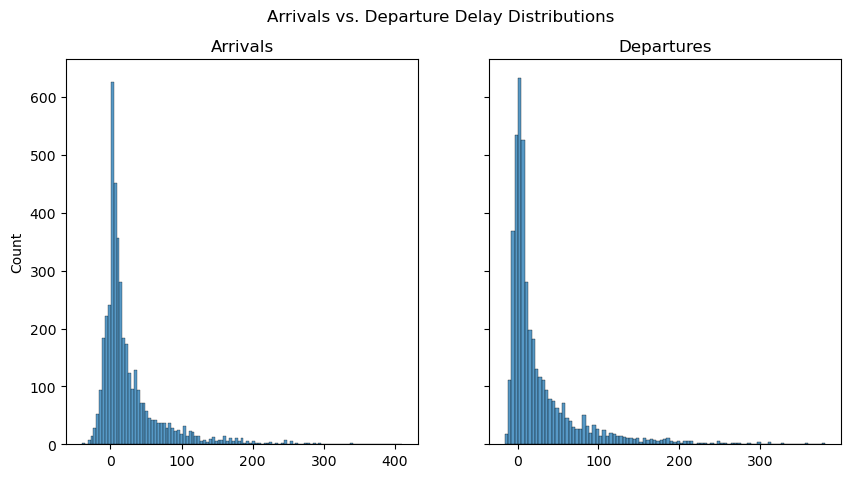

In [24]:
# Plot the new isolated delays dataframes in a second, side by side displot
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Arrivals vs. Departure Delay Distributions')
axes[0].set_title('Arrivals')
axes[1].set_title('Departures')

# Populate graphs

# Arrivals Graph
sns.histplot(ax=axes[0], x=arrivals.values)

# Departures Graph

sns.histplot(ax=axes[1], x=departures.values)

We can see now that even with outlier management, there is still some skew to the data, though there seems to be some normalization happening with Arrivals. For some extra insight, we will apply a Kolmogorov-Smirnov test to our data due to the skew we've observed:

In [39]:
# import Kolmogorov–Smirnov test from scipy
from scipy.stats import kstest

In [40]:
test_result = kstest(arrivals, departures)
test_result

KstestResult(statistic=0.05909725453699395, pvalue=6.010690716756964e-07)

Due to the p-value < 0.05, we reject the null hypothesis that the delays are due to normal distribution